In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Gauss Siedel Verification
A comparison of the Gallo Gauss Seidel solver with the analytic solution to the two group diffusion equations. 

### Problem Set Up 
(Taken from nptel.ac.in/courses/112101007/downloads/Lecturenotes/Lecture15.pdf)  
Assuming steady state, no fission, and no upscattering, the two group diffusion equations take the following form:
$$ D_1\nabla^2 \phi_1 - \Sigma_{a, 1} \phi_1 + s_1^{'''} - \Sigma_{s, 1 \rightarrow 2} \phi_1 = 0$$
$$ D_2\nabla^2 \phi_2 - \Sigma_{a, 2} \phi_2 + s_2^{'''} + \Sigma_{s, 1 \rightarrow 2} \phi_1 = 0$$
With uniform source and negligible scattering in the first group, we get
$$\nabla^2 \phi_1 - \frac{1}{\tau} \phi_1 = \frac{1}{D}s_1^{'''}$$

where $ \tau = \frac{D_1}{\Sigma_{s, 1 \rightarrow 2}}$. Note how similar this form is to the one group, uniform diffusion equation. It gives a similar solution on the domain $-1 \leq x \leq 1$:

$$\phi_1 = \left(1 - \frac{cosh(x/\sqrt{\tau})}{cosh(1/\sqrt{\tau})}\right) \frac{s_1^{'''}}{\Sigma_{a, 1}} $$

Rewrite equation 2 as:

$$ \nabla^2\phi_2 - \frac{1}{L^2}\phi_2 = -\frac{\Sigma_{s, 1\rightarrow 2}}{D_2}\phi_1 $$

where $L^2 = \frac{D_2}{\Sigma_{a, 2}}$. 

Plugging $\phi_1$ in to equation 2 gives 

$$ \nabla^2\phi_2 - \frac{1}{L^2}\phi_2 = -\frac{\Sigma_{s, 1\rightarrow 2}}{D_2}\left(1 - \frac{cosh(x/\sqrt{\tau})}{cosh(1/\sqrt{\tau})}\right) \frac{s_1^{'''}}{\Sigma_{a, 1}} $$

Which we we rewrite as 

$$ \nabla^2\phi_2 - \frac{\phi_2}{L^2} = C_1 - C_2 cosh(\frac{x}{C_3})$$

where $ C_1 = -\frac{s_1^{'''}\Sigma_{s, 1\rightarrow 2} }{D_2\Sigma_{a, 1}} $ , $C_2 = -\frac{s_1^{'''}\Sigma_{s, 1\rightarrow 2} }{D_2\Sigma_{a, 1}cosh(1/\sqrt{\tau})}$ and $C_3 = \sqrt{\tau}$.

Wolfram Alpha gives the solution as:

$$\phi_2 = -\frac{C_1C_3^2L^2}{(C_3 - L)(C_3+L)} + \frac{C_1L^4}{(C_3 - L)(C_3 + L)} + \frac{(C_3^2C_2L^2cosh(\frac{x}{C_3})}{(C_3 - L)(C_3 + L)} + C_4e^{x/L} + C_5e^{x/L}$$

In [14]:
q = 1
absorption = np.array([.1, .1])
scattering = np.array([[1, 1], [0, 1]])
total = np.array([1.1, 2.1])
diffusion = 1/(3*total)
buckling = -absorption/diffusion

In [22]:
x = np.arange(-1, 1, .01)
phi_ratio = (diffusion[1]*buckling[1] + absorption[1])/scattering[0, 1]
buckling

array([-0.33, -0.63])

ValueError: x and y must have same first dimension, but have shapes (200,) and (1,)

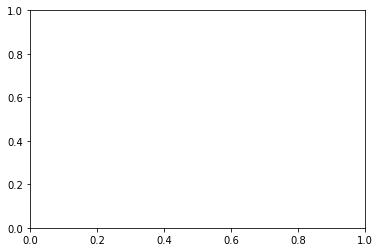

In [17]:
plt.plot(x, phi_ratio)
plt.title("1D Diffusion")